In [1]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Simulation Integral
##declares
theta_o = 0.0
phi = 0.0
S_PT_arr = np.array([])
S_Lo_arr = np.array([])
S_obs_arr = np.array([])
gammas = [2.6]

##formula stuff
S_Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
S_Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
S_Btheta = np.sqrt(1-(1/((S_Gtheta['gamma'])**2)))

##theta max index calculator
for inmin in gammas:
    Gadjust = (S_Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    while (theta_o <= (41*np.pi/180)):
        while (phi <= 2*np.pi):
            S_cosalph = (np.cos(theta_o)*np.cos(S_Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(S_Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            S_num = S_Ltheta['L']*np.sin(S_Ltheta['theta'][0:GminFar]*np.pi/180)
            S_den = 4*np.pi*(S_Gtheta['gamma'][0:GminFar]**4)*((1-(S_Btheta*S_cosalph))**3)
            S_ans = (S_num/S_den)
            S_theta_int = sp.integrate.trapz(y = S_ans[0:GminFar], x = S_Ltheta['theta'][0:GminFar])
            S_PT_arr_i = np.array([(phi*180.0/np.pi), S_theta_int])
            S_PT_arr = np.append(S_PT_arr, S_PT_arr_i, 0)
            phi = phi+2*np.pi/72
        S_PT = S_PT_arr.reshape(73,2)
        S_phi_int = sp.integrate.trapz(y = (S_PT[0:73, 1]), x = (S_PT[0:73,0]))
        S_Lo_arr_i = np.array([(theta_o*180.0/np.pi), S_phi_int])
        S_Lo_arr = np.append(S_Lo_arr, S_Lo_arr_i, 0)    
        theta_o = theta_o+(1*np.pi/180.0)
        phi = 0
        S_PT_arr = np.array([])
    S_Lo = S_Lo_arr.reshape(41,2)
    S_Nval = max(S_Lo[0:41,1])
    S_LoN = S_Lo[0:41,1]/S_Nval

In [7]:
#Fit Integral
##declares
theta_o = 0.0
phi = 0.0
F_PT_arr = np.array([])
F_Lo_arr = np.array([])
F_obs_arr = np.array([])
gammas = [2.6]

##formula stuff
F_Gtheta = pd.read_csv('func_gamma2.csv', sep = ',', header = None, names = ['theta','gamma'])
F_Ltheta = pd.read_csv('func_epsilon2.csv', sep = ',', header = None, names = ['theta','L'])
F_Btheta = np.sqrt(1-(1/((F_Gtheta['gamma'])**2)))

##theta max index calculator
for inmin in gammas:
    Gadjust = (F_Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (41*np.pi/180)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            F_cosalph = (np.cos(theta_o)*np.cos(F_Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(F_Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            F_num = F_Ltheta['L']*np.sin(F_Ltheta['theta'][0:GminFar]*np.pi/180)
            F_den = 4*np.pi*(F_Gtheta['gamma'][0:GminFar]**4)*((1-(F_Btheta*F_cosalph))**3)
            F_ans = (F_num/F_den)
            F_theta_int = sp.integrate.trapz(y = F_ans[0:GminFar], x = F_Ltheta['theta'][0:GminFar])
            F_PT_arr_i = np.array([(phi*180.0/np.pi), F_theta_int])
            F_PT_arr = np.append(F_PT_arr, F_PT_arr_i, 0)
            phi = phi+2*np.pi/72
        F_PT = F_PT_arr.reshape(73,2)
        F_phi_int = sp.integrate.trapz(y = (F_PT[0:73, 1]), x = (F_PT[0:73,0]))
        F_Lo_arr_i = np.array([(theta_o*180.0/np.pi), F_phi_int])
        F_Lo_arr = np.append(F_Lo_arr, F_Lo_arr_i, 0)    
        theta_o = theta_o+(1*np.pi/180.0)
        phi = 0
        F_PT_arr = np.array([])
    F_Lo = F_Lo_arr.reshape(41,2)
    F_Nval = max(F_Lo[0:41,1])
    F_LoN = F_Lo[0:41,1]/F_Nval

In [5]:
#Simulation PW
#Simulation Structure Normalization
SPW_Etheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
SPW_Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','G'])
SPW_Nval = max(SPW_Gtheta['G'])
SPW_NGtheta = SPW_Gtheta['G']/SPW_Nval
i = 0
SPW_RNE_arr = np.array([])
while (i <= 250):
    if (SPW_Etheta['L'][i]/0.100675051) > 1:
        SPW_RNEtheta_i = 1.0
    else:
        SPW_RNEtheta_i = SPW_Etheta['L'][i]/0.100675051
    SPW_RNE_arr_i = np.array([SPW_RNEtheta_i])
    SPW_RNE_arr = np.append(SPW_RNE_arr, SPW_RNE_arr_i)
    i = i+1
SPW_RNE = SPW_RNE_arr.reshape(251,1)

#Simulation Piecewise Array
spw_arr = np.array([])
SPW_Gamma = 100
SPW_theta_core = 10.0
SPW_theta_o = 0.0
while (SPW_theta_o <= 25.0):
    if SPW_theta_o < SPW_theta_core:
        Sy = 1
    elif SPW_theta_core < SPW_theta_o < 2*SPW_theta_core:
        Sq = (SPW_theta_o-SPW_theta_core)*SPW_Gamma
        Sy = Sq**(-4)
    elif 2*SPW_theta_core < SPW_theta_o:
        Sq = (SPW_theta_o-SPW_theta_core)*SPW_Gamma
        Sy = (Sq**(-6))*((SPW_theta_core*SPW_Gamma)**2)
    spw_arr_i = np.array([SPW_theta_o, Sy])
    spw_arr = np.append(spw_arr, spw_arr_i, 0)
    SPW_theta_o = SPW_theta_o + 0.1
SPW = spw_arr.reshape(250,2)

#Piecewise-Structure Max Comparison
i=0
CompPW1_arr = np.array([])
while (i <= 249):
    Cmax1 = max(SPW_RNE[i],SPW[i,1])
    CompPW1_arr_i = np.array([SPW[i,0], Cmax1])
    CompPW1_arr = np.append(CompPW1_arr, CompPW1_arr_i, 0)
    i+=1
CPW1 = CompPW1_arr.reshape(250,2)

In [8]:
#Piecewise-FitStructure Max Comparison
#Fit Structure Normalization
FPW_Etheta = pd.read_csv('func_epsilon2.csv', sep = ',', header = None, names = ['theta','L'])
FPW_Gtheta = pd.read_csv('func_gamma2.csv', sep = ',', header = None, names = ['theta','G'])
FPW_Nval = max(FPW_Gtheta['G'])
FPW_NGtheta = FPW_Gtheta['G']/FPW_Nval
i = 0
FPW_RNE_arr = np.array([])
while (i <= 3142):
    if (FPW_Etheta['L'][i]/8.529779258642211648e-02) > 1:
        FPW_RNEtheta_i = 1.0
    else:
        FPW_RNEtheta_i = FPW_Etheta['L'][i]/8.529779258642211648e-02
    FPW_RNE_arr_i = np.array([FPW_RNEtheta_i])
    FPW_RNE_arr = np.append(FPW_RNE_arr, FPW_RNE_arr_i)
    i = i+1
FPW_RNE = FPW_RNE_arr.reshape(3143,1)

#Fit Piecewise Array
fpw_arr = np.array([])
FPW_Gamma = 100
FPW_theta_core = 10.0
FPW_theta_o = 0.0
while (FPW_theta_o <= 25.0):
    if FPW_theta_o < FPW_theta_core:
        Fy = 1
    elif FPW_theta_core < FPW_theta_o < 2*FPW_theta_core:
        Fq = (FPW_theta_o-FPW_theta_core)*FPW_Gamma
        Fy = Fq**(-4)
    elif 2*FPW_theta_core < FPW_theta_o:
        Fq = (FPW_theta_o-FPW_theta_core)*FPW_Gamma
        Fy = (Fq**(-6))*((FPW_theta_core*FPW_Gamma)**2)
    fpw_arr_i = np.array([FPW_theta_o, Fy])
    fpw_arr = np.append(fpw_arr, fpw_arr_i, 0)
    FPW_theta_o = FPW_theta_o + 5.729577951308232470e-02
FPW = fpw_arr.reshape(437,2)

#Piecewise-Fit Max Comparison
i=0
CompPW2_arr = np.array([])
while (i <= 436):
    Cmax2 = max(FPW_RNE[i],FPW[i,1])
    CompPW2_arr_i = np.array([FPW[i,0], Cmax2])
    CompPW2_arr = np.append(CompPW2_arr, CompPW2_arr_i, 0)
    i+=1
CPW2 = CompPW2_arr.reshape(437,2)

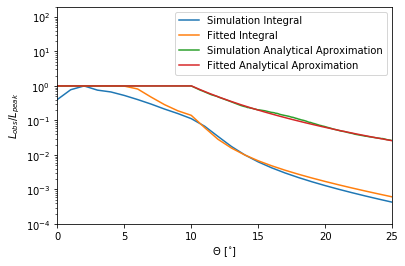

In [12]:
#Graphing    
plt.ylabel('$L_{obs} / L_{peak}$')
plt.yscale("log")
plt.ylim(.0001,200)
plt.xlim(0,25)
plt.xlabel('$\Theta$ $[^{\circ}]$')
x = S_Lo[0:41,0]
y = S_LoN[0:41]
plt.plot(x,y,label='Simulation Integral')
x2 = F_Lo[0:41,0]
y2 = F_LoN[0:41]
plt.plot(x2,y2,label='Fitted Integral')
x3 = CPW1[0:250,0]
y3 = CPW1[0:250,1]
plt.plot(x3,y3,label='Simulation Analytical Aproximation')
x4 = CPW2[0:437,0]
y4 = CPW2[0:437,1]
plt.plot(x4,y4,label='Fitted Analytical Aproximation')
plt.legend(loc="best")